# Intro to Linear Regression and Gradient Descent

This is the code for [this video](https://www.youtube.com/watch?v=XdM6ER7zTLk&index=2&list=PL2-dafEMk2A7YdKv4XfKpfbTH5z6rEEj3) on Youtube by Siraj Raval. We're using a small dataset of student test scores and the amount of hours they studied. Intuitively, there must be a relationship right? The more you study, the better your test scores should be. We're going to use linear regression to prove this relationship.

The target is to predict the students test score, when given the amount they studied 📖🤓📚.

## Overview

Linear regression is a very simple machine learning (=ML) technique. In this project we want to find a line which best fits our data and the way we are going to optimize it, is **THE** most popular optimization methode for deep learning called "Gradient Descent". Gradient Descent is used everywhere in machine learning and deep learning (=DL) and that's the reason why we do this project.

(Actually, linear regession is just ML and not DL, because there aren't any neural networks.)

<img style="max-width: 66%;" src="Linear_regression_files/gradient_descent_example.gif">

## Dataset Visualisation

Our dataset is stored in a `.csv` file, where the first column contains the amount of hours the students studied and the second column contains their test scores:


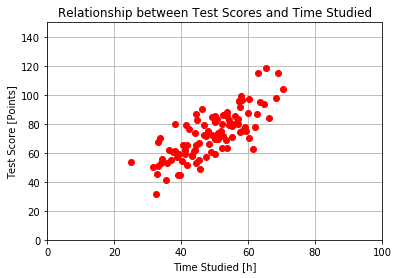

In [8]:
# Load dependencies
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
points = np.genfromtxt("data.csv", delimiter=",") # a magic function to import .csv files

# Display the data using matplotlib
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.axis([0, 100, 0, 150]) # set the limits of the axis
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid() # show the grid
plt.show()

A word on `numpy`: 👩🏻‍🏫

Numpy is the de facto best python library for matrix multiplication and is therefor used in nearly every machine learning project. 

## Linear Regression

First we have to define our "Hyperparameters". They are some kind of tuning knobs for our ML algorithm: 
- `learning_rate`: defines "how fast our model learns". If the learning rate is to low, our model will be to slow to converge. If it's to high our model will never converge. Typical values range over a few orders of magnitude from 0.0001 up to 1.
- `initial_b`: We are fitting our dataseet to the `y = mx + b` formula, where `initial_b` is our first guess for b.
- `initial_m`: initial guess for m 😉
- `num_iterations`: How often to we want to run our training step on the dataset. If it's to low, the model may not converge. If it's to high the training time will take longer than necessary. 😴

Next, we simply pass all our variables to a function called `gradient_descent_runner`.

In [9]:
def train():
    # Define the Hyperparameters
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    # Start the gradient descent algorithm
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    # return the final result to the global scope
    return [b, m]

In the `gradient_descent_runner` function we are simply performing the gradient step over and over again. 🔄

In [10]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        if i % 100 == 0:
            # Print the error every 100th iteration
            # The "error" indicates how good our model fits the data.
            print("Iteration {0}: b = {1:.2f}, m = {2:.2f}, error = {3:.5f}".format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

Who do we measure how good our line fits the data?
For this we are using the sum of the squared errors as an indicator:

<img style="max-width: 50%;" src="Linear_regression_files/sum_of_squared_errors.png">

- $N$ ... number of datapoints in our dataset
- $x_{i}$ ... amount student i has studied 
- $y_{i}$ ... test score of student i
- $i$ ... index of the selected student
- $m$ and $b$ ... optimization parameters 

This can be plotted for different `m` and `b` values.

<img style="max-width: 50%;" src="Linear_regression_files/gradient_descent_error_surface.png">

So basically we are trying to find the values for `b` and `m` where the error is the smallest. Calculating the error for **every** single m and b value is usually very computation intensive and therefor we are using this `Gradient Descent` algorithm.

Remember, the gradient of a function gives us the direction of the steepest ascent. (check [this](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/why-the-gradient-is-the-direction-of-steepest-ascent) out if you wanna dive into the math for this)

<img style="max-width: 50%;" src="Linear_regression_files/gradient_descent_illustration.png">

So in short: The gradient of our error function tells us how to update our optimization parameters. The gradient can be calculated as follows:

$$\operatorname{grad}(f)=\begin{pmatrix}\frac{\partial f}{\partial m}\\ \frac{\partial f}{\partial b} \end{pmatrix}$$


<img style="max-width: 50%;" src="Linear_regression_files/partial_error_derivatives.png">



In [11]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) #see formula above
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) 
    new_b = b_current - (learningRate * b_gradient) 
    new_m = m_current - (learningRate * m_gradient)
    # Note: Minus the gradient we wanna go down. (neg. gradient => steepest descent)
    return [new_b, new_m]

Let's add another function, which will calculate the sum of squared errors. Now we can easily print our error and see how the error is becoming smaller and smaller during training.

In [12]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

Let's train our model 🤖🗜

In [13]:
[b, m] = train()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
Iteration 0: b = 0.01, m = 0.74, error = 1484.58656
Iteration 100: b = 0.04, m = 1.48, error = 112.64702
Iteration 200: b = 0.04, m = 1.48, error = 112.64342
Iteration 300: b = 0.05, m = 1.48, error = 112.63982
Iteration 400: b = 0.05, m = 1.48, error = 112.63622
Iteration 500: b = 0.06, m = 1.48, error = 112.63263
Iteration 600: b = 0.07, m = 1.48, error = 112.62905
Iteration 700: b = 0.07, m = 1.48, error = 112.62547
Iteration 800: b = 0.08, m = 1.48, error = 112.62190
Iteration 900: b = 0.08, m = 1.48, error = 112.61834
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


## Testing

Let's test our model and predict some test scores.

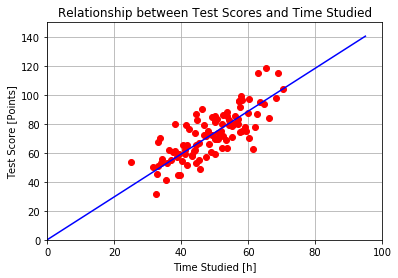

In [14]:
# sample studied hours
h = np.arange(0, 100, 5)

# visualize our model
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.plot(h, m*h + b, 'b')
ax.axis([0, 100, 0, 150])
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid()
plt.show()